# Get datasets

In [1]:
# import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
# Find correct folder to use - /Users/shim/Desktop/AI/CovidbyGovt
%pwd

'/Users/shim/Desktop/AI/CovidbyGovt/analysis3'

## Import Covid-19 global data

In [3]:
# direct link to John Hopkins global timeset data 
data = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

covid = pd.read_csv(data, sep=",")

# preview our data
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,23,25,30,30,30,33,36,36,40,42
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,24,25,26,26,26,26,26,26,27,27
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,326,336,348,364,367,375,384,392,402,407
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,31,33,33,35,35,36,37,37,37,37
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


## Quick analysis of data

In [4]:
today = datetime.now()

# if time is after 5pm (Tucson time), then use today's date 
today5pm = today.replace(hour=17, minute=1, second=0, microsecond=0)
if today > today5pm:
    date = today  

# otherwise use yesterday's date
else:
    date = today - timedelta(1)

# date in string format
date = date.strftime('%D').lstrip("0").replace(" 0", " ")
date = date.replace("/0", "/")
date

'4/23/20'

In [5]:
# get WW death total
covid[[date]].sum()

4/23/20    190857
dtype: int64

In [6]:
# get US death counts
covid[date][covid["Country/Region"]=='US'].sum()

49954

## Visualize data

In [7]:
# get country totals 
country_totals = covid.groupby(['Country/Region']).sum().reset_index()
country_totals.rename(columns = {date:"deaths", "Country/Region": "country"}, inplace = True)
country_totals[['country', 'deaths']].sort_values(by="deaths", ascending=False).head(20)

,country,deaths
171,US,49954
84,Italy,25549
156,Spain,22157
61,France,21889
175,United Kingdom,18791
16,Belgium,6490
65,Germany,5575
80,Iran,5481
36,China,4636
120,Netherlands,4192


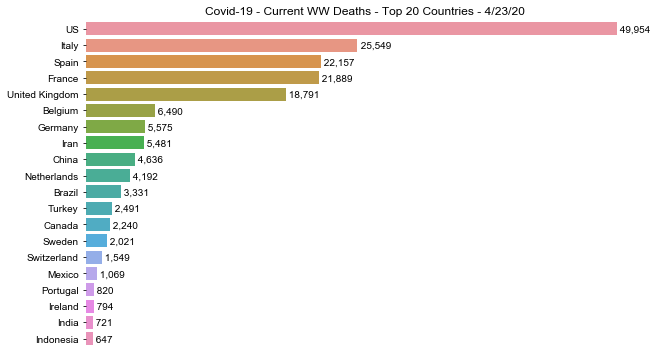

In [8]:
# add value labels on chart
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - float(space/2)
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# select subplot SIZE
fig, ax = plt.subplots(figsize=(10, 6))  

# REPLACE data
data = country_totals.sort_values(by='deaths', ascending=False).head(20)
g = sns.barplot(ax=ax, x='deaths', y='country', data=data)

# set DATE
current_date = str(date)

# put VALUES on selected data
show_values_on_bars(g, "h")  

# remove SPINES
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove LABELS.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom TICKS
g.set(xticks=[])

# set TITLE
g.set_title("Covid-19 - Current WW Deaths - Top 20 Countries - {}".format(current_date))

# SAVE graph to a file
g.figure.savefig("top20_countries.png")

## Investigate ICU Dataset

In [9]:
icu = pd.read_excel('../data/Other/ICU/KHN_ICU_bed_county_analysis_2.xlsx')
icu.head()

,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct,60plus_per_each_icu_bed
0,1001,Autauga,AL,Alabama,1,1,6,55036,10523,0.191,1754.0
1,1003,Baldwin,AL,Alabama,3,3,51,203360,53519,0.263,1049.0
2,1005,Barbour,AL,Alabama,1,1,5,26201,6150,0.235,1230.0
3,1007,Bibb,AL,Alabama,1,1,0,22580,4773,0.211,NaN
4,1009,Blount,AL,Alabama,1,1,6,57667,13600,0.236,2267.0


In [10]:
# check data
icu.isna().sum()

cnty_fips                       0
cnty_name                       0
st                              0
state                           0
hospitals_in_cost_reports       0
Hospitals_in_HC                 0
all_icu                         0
Total_pop                       0
60plus                          0
60plus_pct                      0
60plus_per_each_icu_bed      1665
dtype: int64

In [11]:
# remove column
icu.drop(['60plus_per_each_icu_bed'], axis=1, inplace=True)

In [12]:
# AZ ICU beds by Population
AZ_icu = icu[icu['st'] == 'AZ'].sort_values(by="Total_pop", ascending=False).head(15)
AZ_icu

,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
103,4013,Maricopa,AZ,Arizona,31,34,1004,4155501,808534,0.195
106,4019,Pima,AZ,Arizona,9,9,296,1007257,245814,0.244
107,4021,Pinal,AZ,Arizona,4,4,22,405537,100086,0.247
109,4025,Yavapai,AZ,Arizona,2,2,39,220972,85127,0.385
104,4015,Mohave,AZ,Arizona,4,4,80,204691,73559,0.359
110,4027,Yuma,AZ,Arizona,1,1,42,204281,45739,0.224
98,4005,Coconino,AZ,Arizona,3,3,41,138639,23195,0.167
97,4003,Cochise,AZ,Arizona,4,4,12,126516,35231,0.278
105,4017,Navajo,AZ,Arizona,4,4,12,107902,24267,0.225
96,4001,Apache,AZ,Arizona,4,4,0,71602,14107,0.197


# US by State covid data - merged with ICU data

In [13]:
# direct link to John Hopkins US timeset data 
data2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

covid_US = pd.read_csv(data2, sep=",")

# preview our data
covid_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,45,51,56,58,60,62,63,64,63,69
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,1,1,1,2,3,3,3,3,3,3


In [14]:
covid_US.shape

(3262, 105)

In [15]:
# check US death counts
covid_US[date].sum()

49954

Missing a data point with the global data - because of changing data, I'm not going to worry about this now.

In [16]:
# merge icu with Covid_US deaths - outer join to collect all deaths (some deaths may not be isolated to county level)
left = covid_US
right = icu
county_deaths = pd.merge(left, right, 
              how='outer', on=None, 
              left_on="FIPS", right_on="cnty_fips")
county_deaths

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,84090053.0,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3258,84090054.0,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3259,84090055.0,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3260,84090056.0,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# remove columns that are doubled by merge
county_deaths.drop(columns=['cnty_fips','cnty_name','state'])

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/21/20,4/22/20,4/23/20,st,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,64,63,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,84090053.0,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3258,84090054.0,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,...,19,20,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3259,84090055.0,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3260,84090056.0,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,1,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualize - US State Data

In [18]:
# group the state deaths
states = county_deaths[['Province_State', date]].copy()
states = states.groupby(['Province_State'], sort=False).sum().reset_index()

# show descending
states = states.sort_values(by=date, ascending=False)
states.head(10)

,Province_State,4/23/20
37,New York,20973
35,New Jersey,5426
27,Michigan,2977
26,Massachusetts,2360
43,Pennsylvania,1724
18,Illinois,1688
11,Connecticut,1639
23,Louisiana,1599
9,California,1533
14,Florida,987


In [19]:
# check total deaths
states[date].sum()

49954

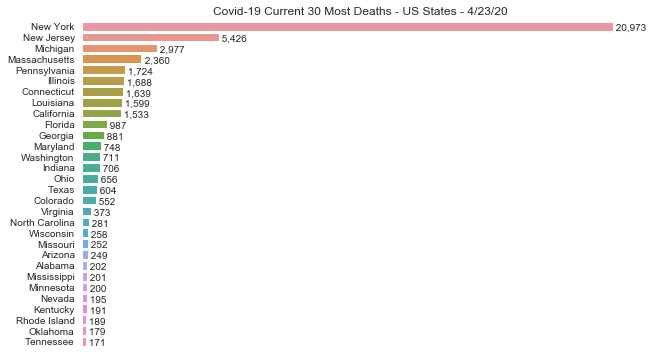

In [20]:
# function for setting horizontal labels
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# REPLACE dataset
data = states.head(30)
current_date = str(date)

# plot VALUES on selected data
g = sns.barplot(ax=ax, x=date, y='Province_State', data=data)
show_values_on_bars(g, "h")  

# remove spines
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove labels.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom values
g.set(xticks=[])

# set TITLE
g.set_title("Covid-19 Current 30 Most Deaths - US States - {}".format(current_date))

# save graph to a FILENAME
g.figure.savefig("US_states30.png")

## Visualize - AZ County Deaths

In [21]:
# tally of county deaths
co = county_deaths[['Admin2', 'Province_State', date]].copy()
co.rename(columns = {'Admin2':'county','Province_State':'state',date:'total_deaths'}, inplace = True)
co = co.sort_values(by='total_deaths', ascending=False)
co.head(10)

,county,state,total_deaths
1863,New York,New York,16388
1862,Nassau,New York,1471
1317,Wayne,Michigan,1396
615,Cook,Illinois,1142
1884,Suffolk,New York,959
1785,Essex,New Jersey,932
1780,Bergen,New Jersey,907
1892,Westchester,New York,863
209,Los Angeles,California,797
1787,Hudson,New Jersey,666


In [22]:
# check total deaths
co["total_deaths"].sum()

49954

In [23]:
# check AZ totals by county
AZ_county = co[co['state']=='Arizona']
AZ_county

,county,state,total_deaths
108,Maricopa,Arizona,115
111,Pima,Arizona,70
103,Coconino,Arizona,32
110,Navajo,Arizona,13
112,Pinal,Arizona,8
101,Apache,Arizona,5
109,Mohave,Arizona,3
114,Yavapai,Arizona,1
115,Yuma,Arizona,1
107,La Paz,Arizona,1


Hmmm...Unassigned and Out of AZ need to reassigned ... eventually...for now I'll keep them in the totals

In [24]:
# deaths in AZ - check with chart of states
AZ_county['total_deaths'].sum()

249

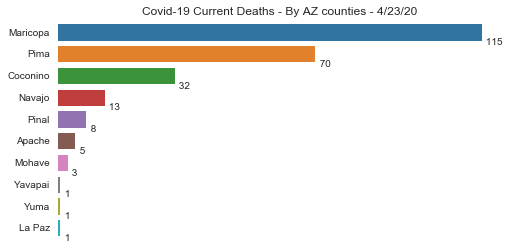

In [50]:
# add values on chart
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()+ float(space/2)
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# select subplot size
fig, ax = plt.subplots(figsize=(8, 4))  

# put values on selected data
data = AZ_county[AZ_county['total_deaths'] >= 1]
g = sns.barplot(ax=ax, x='total_deaths', y='county', data=data)
show_values_on_bars(g, "h")  

# remove spines
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove labels.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom values
g.set(xticks=[])

# set title
g.set_title("Covid-19 Current Deaths - By AZ counties - {}".format(str(date)))

# save graph to a file
g.figure.savefig("AZ_counties_list.png")

# Timeseries - Worldwide

In [26]:
# look at past month worldwide
covid_ww = covid.iloc[:, 4:].sum(axis=0)
df = covid_ww.tail(30)
df.tail()

4/19/20    165043
4/20/20    169985
4/21/20    176582
4/22/20    183064
4/23/20    190857
dtype: int64

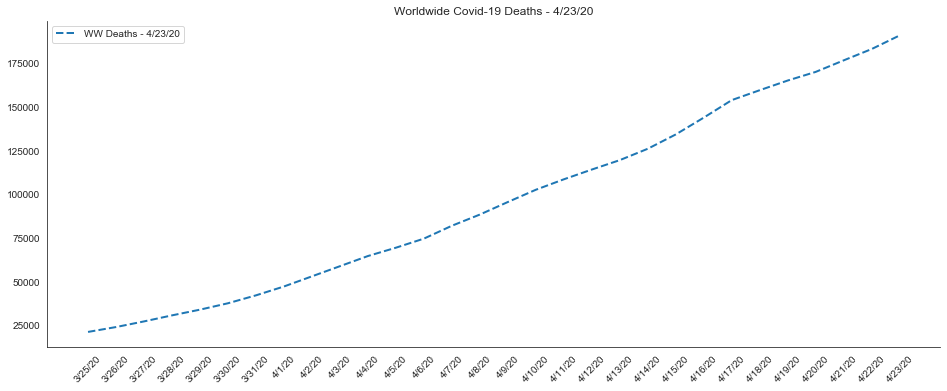

In [27]:
# simple graph
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2)
sns.despine(right=True, top=True)
ax.lines[0].set_linestyle("--")
plt.xticks(rotation=45)
ax.legend(['WW Deaths - {}'.format(str(date))]) 
plt.title("Worldwide Covid-19 Deaths - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("WW_deaths.png")

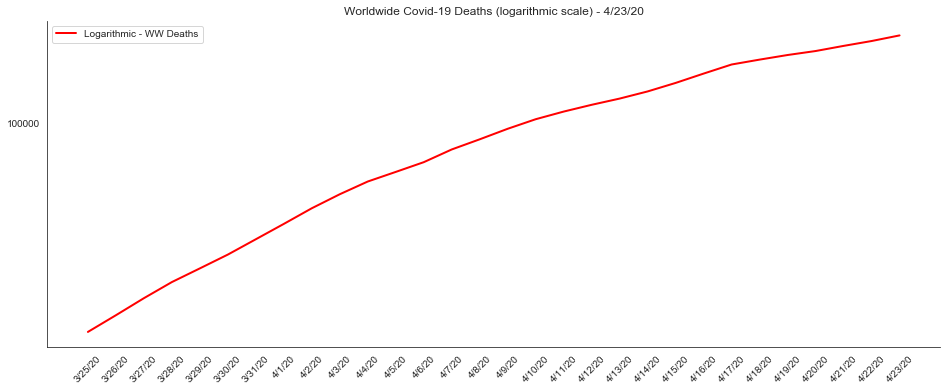

In [28]:
# look at logarithmic growth
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2, color='red')
sns.despine(right=True, top=True)
ax.lines[0].set_linestyle("-")
plt.xticks(rotation=45)
ax.legend(['Logarithmic - WW Deaths']) 
plt.title("Worldwide Covid-19 Deaths (logarithmic scale) - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("WW_deaths_log.png")

## WW - > Multiple Country Timeseries

In [29]:
# melt dataset - Keep certain columns and change others to vertical axis(?)
covid_ww_long = pd.melt(covid, id_vars=covid.iloc[:, :4],
var_name='Date', value_name='Deaths')
covid_ww_long

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
24547,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/23/20,0
24548,NaN,South Sudan,6.877000,31.307000,4/23/20,0
24549,NaN,Western Sahara,24.215500,-12.885800,4/23/20,0
24550,NaN,Sao Tome and Principe,0.186360,6.613081,4/23/20,0


In [30]:
# group countries by date - sort is False here because the date is not the sort
countries = covid_ww_long.groupby(['Date', 'Country/Region'], sort=False).sum().reset_index()

# drop columns that don't make sense
countries.drop(['Lat','Long'], axis=1, inplace=True)

# look at timeseries 
countries

,Date,Country/Region,Deaths
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0
...,...,...,...
17200,4/23/20,Malawi,3
17201,4/23/20,South Sudan,0
17202,4/23/20,Western Sahara,0
17203,4/23/20,Sao Tome and Principe,0


In [31]:
# check that it matches above summary
top = countries[countries['Date']==date].sort_values(by='Deaths', ascending = False).head(10)
top

,Date,Country/Region,Deaths
17176,4/23/20,US,49954
17097,4/23/20,Italy,25549
17158,4/23/20,Spain,22157
17076,4/23/20,France,21889
17174,4/23/20,United Kingdom,18791
17036,4/23/20,Belgium,6490
17080,4/23/20,Germany,5575
17093,4/23/20,Iran,5481
17052,4/23/20,China,4636
17126,4/23/20,Netherlands,4192


In [32]:
# total deaths in top
top['Deaths'].sum()

164714

### Worldwide Timeseries - Graphs

In [33]:
# add a column for LEGEND to top
top['legend']= top['Country/Region'] + ' - ' + top['Deaths'].astype(str)

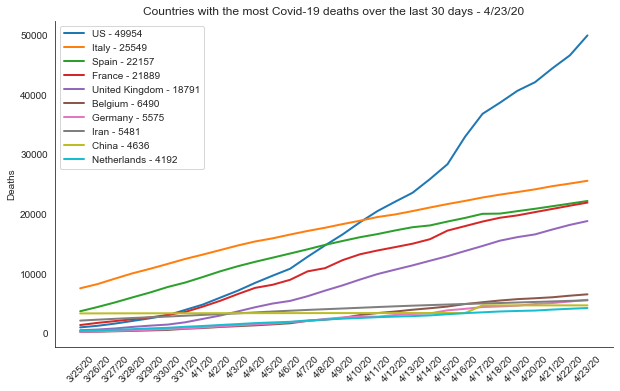

In [34]:
# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# set ATTRIBUTEs for each dataset
for i in top['Country/Region']:
    # set data to last 30 days
    df = countries[countries['Country/Region' ] == i].tail(30)
    # set graph
    g = sns.lineplot(ax=ax, x='Date', y='Deaths', data=df, sort=False, linewidth=2)  

# set date 
current_date = str(date) 

# remove spines
sns.despine(right=True, top=True)
sns.set_style('white')

# set TITLE
g.set_title("Countries with the most Covid-19 deaths over the last 30 days - {}".format(current_date))

# set extras
g.set_xlabel("")
plt.legend(top['legend'])
plt.xticks(rotation=45)
plt.show()

# save graph to a FILENAME
fig.savefig("Top10_countries.png")

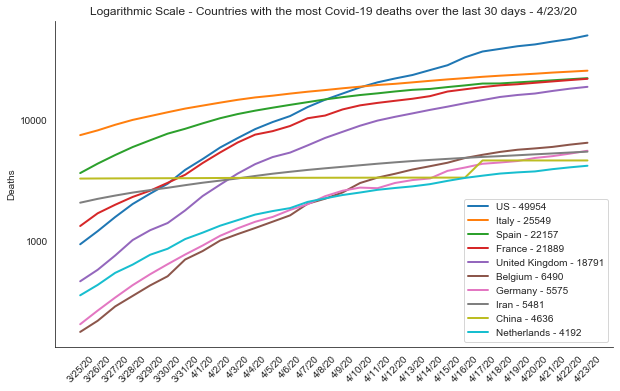

In [35]:
# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# set log scale
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )

# set ATTRIBUTEs for each dataset
for i in top['Country/Region']:
    # set data to last 30 days
    df = countries[countries['Country/Region' ] == i].tail(30)
    # set graph
    g = sns.lineplot(ax=ax, x='Date', y='Deaths', data=df, sort=False, linewidth=2)  

# set line style
ax.lines[0].set_linestyle("-")

# set date 
current_date = str(date) 

# remove spines
sns.despine(right=True, top=True)
sns.set_style('white')

# set TITLE
g.set_title("Logarithmic Scale - Countries with the most Covid-19 deaths over the last 30 days - {}".format(current_date))

# set extras
g.set_xlabel("")
plt.legend(top['legend'])
plt.xticks(rotation=45)
plt.show()

# save graph to a FILENAME
fig.savefig("Top10_countries_log.png")

## Arizona timeseries

In [36]:
# AZ Deaths by Date, ICU and Population 
AZ = county_deaths[county_deaths['Province_State']=='Arizona']

In [37]:
# investigate AZ dataset
AZ.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
101,84004001.0,US,USA,840,4001.0,Apache,Arizona,US,35.394650,-109.489238,...,4001.0,Apache,AZ,Arizona,4.0,4.0,0.0,71602.0,14107.0,0.197
102,84004003.0,US,USA,840,4003.0,Cochise,Arizona,US,31.879347,-109.751609,...,4003.0,Cochise,AZ,Arizona,4.0,4.0,12.0,126516.0,35231.0,0.278
103,84004005.0,US,USA,840,4005.0,Coconino,Arizona,US,35.838834,-111.770718,...,4005.0,Coconino,AZ,Arizona,3.0,3.0,41.0,138639.0,23195.0,0.167
104,84004007.0,US,USA,840,4007.0,Gila,Arizona,US,33.801901,-110.813278,...,4007.0,Gila,AZ,Arizona,3.0,3.0,8.0,53145.0,18752.0,0.353
105,84004009.0,US,USA,840,4009.0,Graham,Arizona,US,32.931669,-109.888218,...,4009.0,Graham,AZ,Arizona,1.0,1.0,0.0,37700.0,6933.0,0.184


In [38]:
# drop extra columns (not dates)
drops = ['UID','iso2','iso3','code3','Province_State','Country_Region','cnty_fips','cnty_name','st','state','hospitals_in_cost_reports','Hospitals_in_HC','all_icu','Total_pop','60plus','60plus_pct']
AZ_dates = AZ.drop(drops, axis=1,inplace=False)
AZ_dates.tail()

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
113,4023.0,Santa Cruz,31.525090,-110.847909,"Santa Cruz, Arizona, US",46498,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,4025.0,Yavapai,34.599339,-112.553859,"Yavapai, Arizona, US",235099,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
115,4027.0,Yuma,32.768957,-113.906667,"Yuma, Arizona, US",213787,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
3159,80004.0,Out of AZ,0.000000,0.000000,"Out of AZ, Arizona, US",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3211,90004.0,Unassigned,0.000000,0.000000,"Unassigned, Arizona, US",0,0,0,0,0,...,24,27,28,42,0,1,1,0,0,0


## Calculating METRICS

In [39]:
# Yesterday's date

# Today's date
today = datetime.now()

# if time is after 5pm (Tucson time), then use today's date 
today5pm = today.replace(hour=17, minute=1, second=0, microsecond=0)
if today > today5pm:
    date_ext = today  

# otherwise use yesterday's date for data
else:
    date_ext = today - timedelta(1)
    
# define yesterday (external) is in datetime format
yesterday_ext = date_ext - timedelta(1)

# yesterday in string format
yesterday = yesterday_ext.strftime('%D').lstrip("0").replace(" 0", " ")
yesterday = yesterday.replace("/0", "/")
yesterday

'4/22/20'

In [40]:
# Add Changes , Pct_change, and Pct_pop columns
AZ_dates['Change'] = AZ_dates[date] - AZ_dates[yesterday]
AZ_dates['Pct_change'] = AZ_dates['Change']/AZ_dates[yesterday]*100
AZ_dates['Deaths_per_mil']= AZ_dates[date]/AZ_dates['Population']*1000000

### Metrics for Total AZ Deaths by County

In [41]:
# Show list of counties and current deaths by Population size
AZ_dates = AZ_dates.sort_values(by='Population', ascending=False)

# Add all metrics - rounded
AZ_dates[['Combined_Key', 'Population', date,'Change', 'Pct_change','Deaths_per_mil']].round()

,Combined_Key,Population,4/23/20,Change,Pct_change,Deaths_per_mil
108,"Maricopa, Arizona, US",4485414,115,18,19.0,26.0
111,"Pima, Arizona, US",1047279,70,2,3.0,67.0
112,"Pinal, Arizona, US",462789,8,0,0.0,17.0
114,"Yavapai, Arizona, US",235099,1,0,0.0,4.0
115,"Yuma, Arizona, US",213787,1,0,0.0,5.0
109,"Mohave, Arizona, US",212181,3,0,0.0,14.0
103,"Coconino, Arizona, US",143476,32,-3,-9.0,223.0
102,"Cochise, Arizona, US",125922,0,0,NaN,0.0
110,"Navajo, Arizona, US",110924,13,1,8.0,117.0
101,"Apache, Arizona, US",71887,5,0,0.0,70.0


### AZ timeseries by county

In [42]:
# drop extra columns
AZ_dates.drop(['Change', 'Pct_change','Deaths_per_mil'], axis=1, inplace=True)
AZ_dates.tail()

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
105,4009.0,Graham,32.931669,-109.888218,"Graham, Arizona, US",38837,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,4012.0,La Paz,33.728542,-113.981003,"La Paz, Arizona, US",21108,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
106,4011.0,Greenlee,33.214988,-109.240528,"Greenlee, Arizona, US",9498,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3159,80004.0,Out of AZ,0.000000,0.000000,"Out of AZ, Arizona, US",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3211,90004.0,Unassigned,0.000000,0.000000,"Unassigned, Arizona, US",0,0,0,0,0,...,24,27,28,42,0,1,1,0,0,0


In [43]:
# melt dataset - Keep certain columns and change others to vertical axis(?)
AZ_counties = pd.melt(AZ_dates, id_vars=AZ_dates.iloc[:, :6],
var_name='Date', value_name='Deaths')
AZ_counties

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths
0,4013.0,Maricopa,33.348359,-112.491815,"Maricopa, Arizona, US",4485414,1/22/20,0
1,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,1/22/20,0
2,4021.0,Pinal,32.905256,-111.344948,"Pinal, Arizona, US",462789,1/22/20,0
3,4025.0,Yavapai,34.599339,-112.553859,"Yavapai, Arizona, US",235099,1/22/20,0
4,4027.0,Yuma,32.768957,-113.906667,"Yuma, Arizona, US",213787,1/22/20,0
...,...,...,...,...,...,...,...,...
1576,4009.0,Graham,32.931669,-109.888218,"Graham, Arizona, US",38837,4/23/20,0
1577,4012.0,La Paz,33.728542,-113.981003,"La Paz, Arizona, US",21108,4/23/20,1
1578,4011.0,Greenlee,33.214988,-109.240528,"Greenlee, Arizona, US",9498,4/23/20,0
1579,80004.0,Out of AZ,0.000000,0.000000,"Out of AZ, Arizona, US",0,4/23/20,0


In [44]:
# add a column for LEGEND to top
AZ_counties['legend']= AZ_counties['Admin2'] + ' - ' + AZ_counties['Deaths'].astype(str)
AZ_counties

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths,legend
0,4013.0,Maricopa,33.348359,-112.491815,"Maricopa, Arizona, US",4485414,1/22/20,0,Maricopa - 0
1,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,1/22/20,0,Pima - 0
2,4021.0,Pinal,32.905256,-111.344948,"Pinal, Arizona, US",462789,1/22/20,0,Pinal - 0
3,4025.0,Yavapai,34.599339,-112.553859,"Yavapai, Arizona, US",235099,1/22/20,0,Yavapai - 0
4,4027.0,Yuma,32.768957,-113.906667,"Yuma, Arizona, US",213787,1/22/20,0,Yuma - 0
...,...,...,...,...,...,...,...,...,...
1576,4009.0,Graham,32.931669,-109.888218,"Graham, Arizona, US",38837,4/23/20,0,Graham - 0
1577,4012.0,La Paz,33.728542,-113.981003,"La Paz, Arizona, US",21108,4/23/20,1,La Paz - 1
1578,4011.0,Greenlee,33.214988,-109.240528,"Greenlee, Arizona, US",9498,4/23/20,0,Greenlee - 0
1579,80004.0,Out of AZ,0.000000,0.000000,"Out of AZ, Arizona, US",0,4/23/20,0,Out of AZ - 0


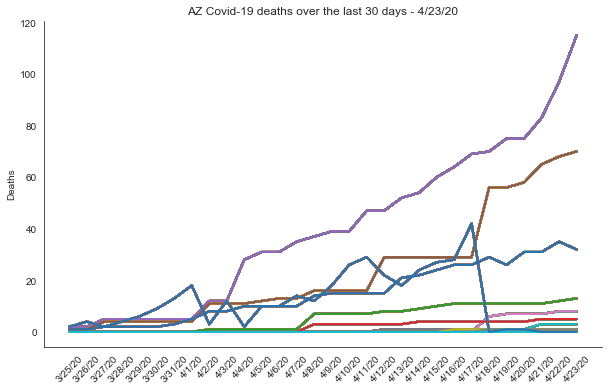

In [45]:
# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# # set log scale
# ax.set(yscale="log")
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )

# set ATTRIBUTEs for each dataset
for i in AZ_counties['Admin2']:
    # set data to last 30 days
    df = AZ_counties[AZ_counties['Admin2'] == i].tail(30)
    # set graph
    g = sns.lineplot(ax=ax, x='Date', y='Deaths', data=df, sort=False, linewidth=2)  

# set line style
ax.lines[0].set_linestyle("-")

# set date 
current_date = str(date) 

# remove spines
sns.despine(right=True, top=True)
sns.set_style('white')

# set TITLE
g.set_title("AZ Covid-19 deaths over the last 30 days - {}".format(current_date))

# set extras
g.set_xlabel("")
plt.xticks(rotation=45)
plt.show()

# save graph to a FILENAME
fig.savefig("AZ_counties.png")

### STUCK ON GETTING THE LEGEND RIGHT!
#### They relabeled some entries  on 4/18/20. Pima has just started reporting more regularly than once or twice a week!

## Calculating Pima PCT_CHANGE

In [46]:
Pima_dates=AZ_dates[AZ_dates['Admin2']=='Pima'].copy()
Pima_dates

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
111,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,0,0,0,0,...,29,29,29,29,56,56,58,65,68,70


In [47]:
# unpivot DataFrame from wide to long format, optionally leaving identifiers set.
Pima_long = pd.melt(Pima_dates, id_vars=Pima_dates.iloc[:,:6],
var_name='Date', value_name='Deaths')
Pima_long.tail()


,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths
88,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/19/20,56
89,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/20/20,58
90,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/21/20,65
91,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/22/20,68
92,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/23/20,70


In [48]:
Pima30 = Pima_long.copy().tail(30)
Pima30[['PC']]=Pima30[['Deaths']].pct_change()
Pima30.tail()

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths,PC
88,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/19/20,56,0.000000
89,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/20/20,58,0.035714
90,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/21/20,65,0.120690
91,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/22/20,68,0.046154
92,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/23/20,70,0.029412


In [52]:
# set dataset for graphs
df = Pima30
df=df[df['Deaths']>0]
df.tail(10)

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths,PC
83,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/14/20,29,0.000000
84,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/15/20,29,0.000000
85,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/16/20,29,0.000000
86,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/17/20,29,0.000000
87,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/18/20,56,0.931034
88,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/19/20,56,0.000000
89,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/20/20,58,0.035714
90,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/21/20,65,0.120690
91,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/22/20,68,0.046154
92,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/23/20,70,0.029412


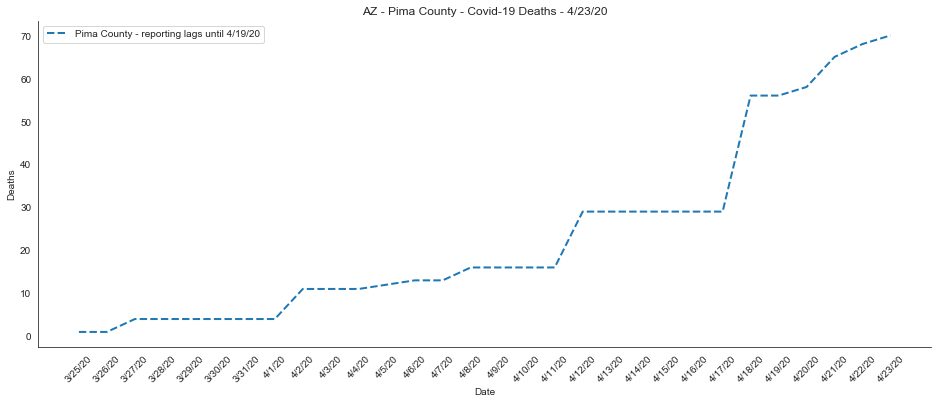

In [60]:
# simple timeseries graph
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x='Date', y='Deaths', data=df, sort=False, linewidth=2)
sns.despine(right=True, top=True)
ax.lines[0].set_linestyle("--")
plt.xticks(rotation=45)
ax.legend(['Pima County - reporting lags until 4/19/20']) 
plt.title("AZ - Pima County - Covid-19 Deaths - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("Pima_deaths.png")

###### What do I do when reporting is like this? Does ML take this into account? It can't because it's just an algorithm. Should I redo the dataset to weekly?

## TO DO:
1. Change data to look at increment per day per country - KEY!!!!!!!!!
2. Look at rate of increase
3. Look at time-series - # of days vs # of deaths, # of days vs. # of cases
4. Seperate out test cases vs training case
    - US separately is the Test case
    - outlier - South Korea, Singapore, China
    - ROW is the training case
5. Look at 2 plots
    - in deaths 
    - in deaths as a % of pop
    